In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from Hamiltonian import Hamiltonian
%matplotlib inline

# Minggu ke-3 Bulan Maret

**Tujuan:**
- Melihat pengaruh frekuensi medan ($\omega$)

In [2]:
wa = 1.0*2*np.pi # frekuensi eksitasi atom
wc_list = [0.1*wa, 0.5*wa, 1.0*wa, 1.5*wa, 2.0*wa]  # List dari frekuensi medan
N = 15 
use_rwa = False
g_list = np.linspace(0, 5, 50)*wa # Kuat interaksi

#oprator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus

# Inisiasi list S & E
E_list = np.zeros([len(wc_list), len(g_list)])
S_list = np.zeros([len(wc_list), len(g_list)])

## Melihat Pengaruhnya Terhadap Energi Sistem 

In [3]:
help(Hamiltonian)

Help on function Hamiltonian in module Hamiltonian:

Hamiltonian(omega_a, omega_m, g, n, a, sm, rwa)
    Mendefinisikan Hamiltonian untuk model Jaynes-Cumming dengan parameter yang sesuai.
    
    Parameter
    ---------
    omega_a : :int/float
            Merupakan ungkapan frekuensi transisi atom
    
    omega_m : :int/float
            Merupakan ungkapan frekuensi meden
    
    g : :int/float
        Merupakan ungkapan parameter kuat interaksi sistem atom-meda
    
    n : :int
        Merupakan ungkapan parameter jumlah N medan
        
    a : :Qobj
        Operator anihilasi
    
    sm : :Qobj
        Operator sigma_negatif
    
    rwa : :bool
        Merupakan parameter RWA.
        True : menggunakan RWA
        False : tidak menggunakan RWA



In [5]:
for i, wc in enumerate(wc_list):
    for j, g in enumerate(g_list):
        # Hitung Hamiltonian
        H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
        # menghitung ground state & energinya
        gnd_energy, gnd_state = H.groundstate() 
        rhoo = ptrace(gnd_state, 1)
        E_list[i,j] = gnd_energy/(wa)
        S_list[i,j] = entropy_vn(rhoo, 2)

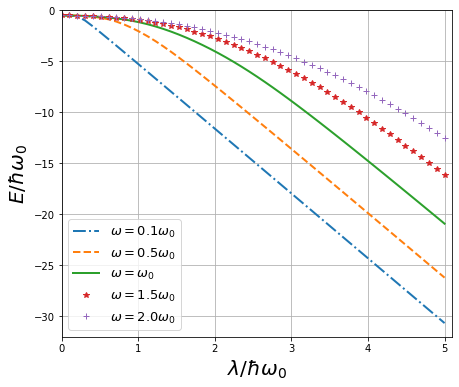

In [7]:
# Plot energi sistem
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(7,6))
axes.set(xlim=(0, 5.1), ylim=(-32, 0))
axes.plot(g_list/wa, E_list[0], '-.', linewidth=2, label=r"$\omega=0.1\omega_{0}$")
axes.plot(g_list/wa, E_list[1], '--', linewidth=2, label=r"$\omega=0.5\omega_{0}$")
axes.plot(g_list/wa, E_list[2], '-', linewidth=2, label=r"$\omega=\omega_{0}$")
axes.plot(g_list/wa, E_list[3], '*', linewidth=2, label=r"$\omega=1.5\omega_{0}$")
axes.plot(g_list/wa, E_list[4], '+', linewidth=2, label=r"$\omega=2.0\omega_{0}$")
axes.legend(loc=0,  fontsize=13)
axes.set_xlabel(r'$\lambda/\hbar\omega_{0}$', fontsize=20)
axes.set_ylabel(r'$E/\hbar\omega_{0}$', fontsize=20)
axes.grid()
plt.savefig('Plot_Energi_g_frekuensi medan.pdf')  

In [6]:
E_list

array([[ -0.5       ,  -0.51043847,  -0.58225823,  -0.99619952,
         -1.57690113,  -2.19550045,  -2.8269831 ,  -3.46452772,
         -4.10545774,  -4.74848619,  -5.39291077,  -6.03831344,
         -6.68442895,  -7.33108053,  -7.97814564,  -8.62553661,
         -9.27318899,  -9.92105433, -10.56909549, -11.21728351,
        -11.86559546, -12.51401298, -13.16252116, -13.81110777,
        -14.4597627 , -15.10847751, -15.75724507, -16.40605938,
        -17.05491528, -17.70380838, -18.35273485, -19.0016914 ,
        -19.65067514, -20.29968354, -20.94871439, -21.59776572,
        -22.24683579, -22.89592306, -23.54502613, -24.19414378,
        -24.84327489, -25.49241846, -26.14157358, -26.79073944,
        -27.4399153 , -28.08910047, -28.73829434, -29.38749634,
        -30.03670597, -30.68592274],
       [ -0.5       ,  -0.50700664,  -0.52884993,  -0.56834979,
         -0.63156841,  -0.73022251,  -0.88263083,  -1.10314887,
         -1.38848076,  -1.72789457,  -2.1145997 ,  -2.54525658,
   

## Melihat Pengaruhnya Terhadap Entropi

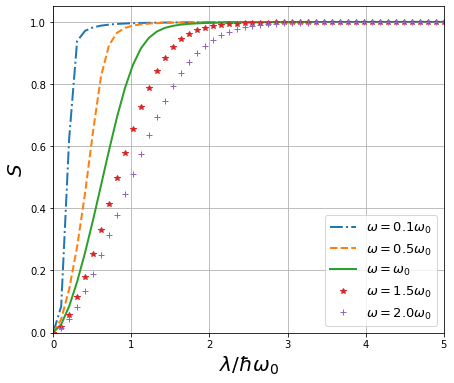

In [8]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(7,6))
axes.set(xlim=(0, 5), ylim=(0, 1.05))
axes.plot(g_list/wa, S_list[0], '-.', linewidth=2, label=r"$\omega=0.1\omega_{0}$")
axes.plot(g_list/wa, S_list[1], '--', linewidth=2, label=r"$\omega=0.5\omega_{0}$")
axes.plot(g_list/wa, S_list[2], '-', linewidth=2, label=r"$\omega=\omega_{0}$")
axes.plot(g_list/wa, S_list[3], '*', linewidth=2, label=r"$\omega=1.5\omega_{0}$")
axes.plot(g_list/wa, S_list[4], '+', linewidth=2, label=r"$\omega=2.0\omega_{0}$")
axes.legend(loc=0,  fontsize=13)
axes.set_xlabel(r'$\lambda/\hbar\omega_{0}$', fontsize=20)
axes.set_ylabel(r'$S$', fontsize=20)
axes.grid()
plt.savefig('Plot_Entropi_g_frekuensi medan.pdf')  

## Melihat Pengaruhnya Fungsi Wigner

In [10]:
g_list = np.array([0.1, 0.2, 0.5, 1, 1.5, 2.0, 2.5])*2*np.pi

In [11]:
psi_list1 = []
for g in g_list:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc_list[0], g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    gnd_energy, gnd_state = H.groundstate() 
    psi_list1.append(gnd_state)

In [12]:
len(psi_list1)

7

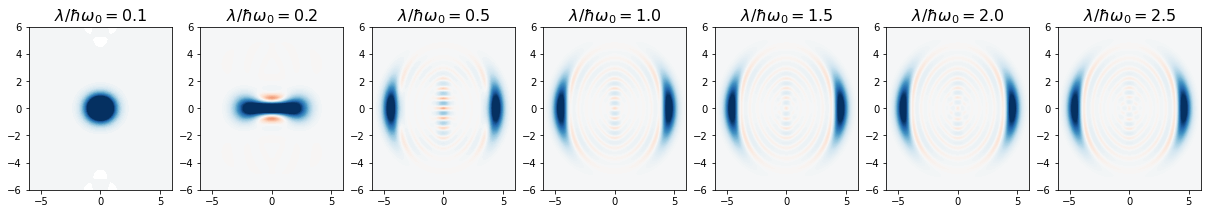

In [21]:
xvec = np.linspace(-6,6,200)
fig, axes = plt.subplots(1,len(g_list), sharex=True, figsize=(3*len(g_list),3))

for idx, psi in enumerate(psi_list1):
    # menghitung densitas matriks
    rho_cavity = ptrace(psi, 0)
        
    # menghitung wigner function
    W = wigner(rho_cavity, xvec, xvec)
    
    g_plot = g_list[idx]/(wa)
    # plot wigner function
    axes[idx].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'))
    axes[idx].set_title(r"$\lambda/\hbar\omega_0 = %.1f$" % g_plot, fontsize=16)
    plt.savefig('Plot_wigner_g_f1.pdf')

In [22]:
psi_list1 = []
for g in g_list:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc_list[1], g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    gnd_energy, gnd_state = H.groundstate() 
    psi_list1.append(gnd_state)

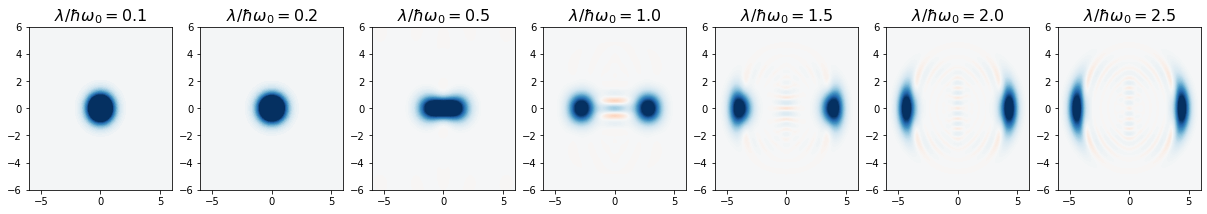

In [23]:
xvec = np.linspace(-6,6,200)
fig, axes = plt.subplots(1,len(g_list), sharex=True, figsize=(3*len(g_list),3))

for idx, psi in enumerate(psi_list1):
    # menghitung densitas matriks
    rho_cavity = ptrace(psi, 0)
        
    # menghitung wigner function
    W = wigner(rho_cavity, xvec, xvec)
    
    g_plot = g_list[idx]/(wa)
    # plot wigner function
    axes[idx].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'))
    axes[idx].set_title(r"$\lambda/\hbar\omega_0 = %.1f$" % g_plot, fontsize=16)
    plt.savefig('Plot_wigner_g_f2.pdf')

In [24]:
psi_list1 = []
for g in g_list:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc_list[2], g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    gnd_energy, gnd_state = H.groundstate() 
    psi_list1.append(gnd_state)

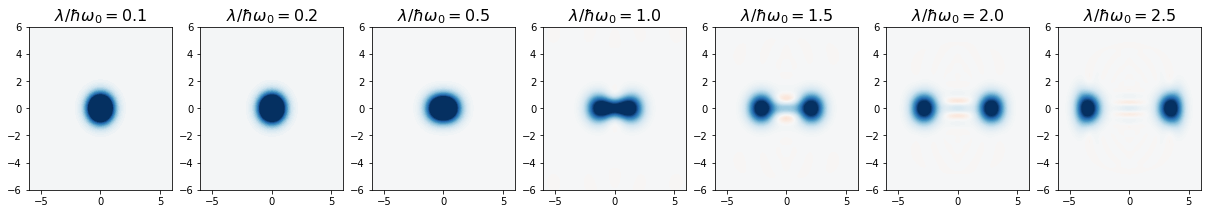

In [25]:
xvec = np.linspace(-6,6,200)
fig, axes = plt.subplots(1,len(g_list), sharex=True, figsize=(3*len(g_list),3))

for idx, psi in enumerate(psi_list1):
    # menghitung densitas matriks
    rho_cavity = ptrace(psi, 0)
        
    # menghitung wigner function
    W = wigner(rho_cavity, xvec, xvec)
    
    g_plot = g_list[idx]/(wa)
    # plot wigner function
    axes[idx].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'))
    axes[idx].set_title(r"$\lambda/\hbar\omega_0 = %.1f$" % g_plot, fontsize=16)
    plt.savefig('Plot_wigner_g_f3.pdf')

In [26]:
psi_list1 = []
for g in g_list:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc_list[3], g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    gnd_energy, gnd_state = H.groundstate() 
    psi_list1.append(gnd_state)

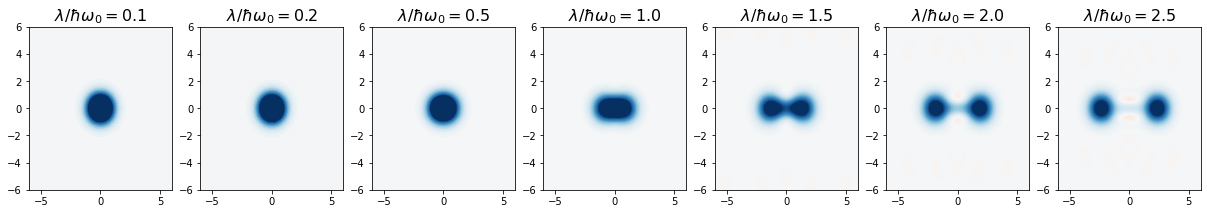

In [27]:
xvec = np.linspace(-6,6,200)
fig, axes = plt.subplots(1,len(g_list), sharex=True, figsize=(3*len(g_list),3))

for idx, psi in enumerate(psi_list1):
    # menghitung densitas matriks
    rho_cavity = ptrace(psi, 0)
        
    # menghitung wigner function
    W = wigner(rho_cavity, xvec, xvec)
    
    g_plot = g_list[idx]/(wa)
    # plot wigner function
    axes[idx].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'))
    axes[idx].set_title(r"$\lambda/\hbar\omega_0 = %.1f$" % g_plot, fontsize=16)
    plt.savefig('Plot_wigner_g_f4.pdf')

In [28]:
psi_list1 = []
for g in g_list:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc_list[4], g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    gnd_energy, gnd_state = H.groundstate() 
    psi_list1.append(gnd_state)

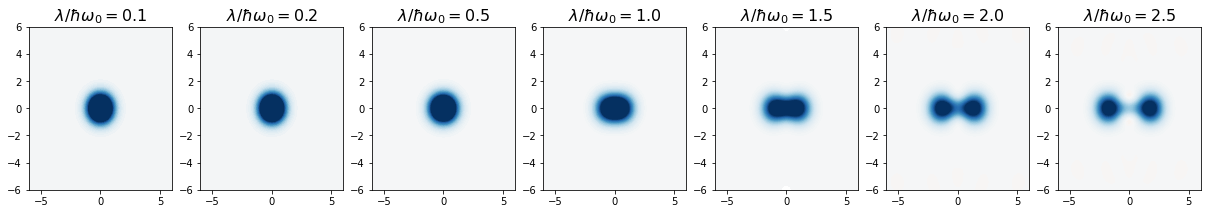

In [29]:
xvec = np.linspace(-6,6,200)
fig, axes = plt.subplots(1,len(g_list), sharex=True, figsize=(3*len(g_list),3))

for idx, psi in enumerate(psi_list1):
    # menghitung densitas matriks
    rho_cavity = ptrace(psi, 0)
        
    # menghitung wigner function
    W = wigner(rho_cavity, xvec, xvec)
    
    g_plot = g_list[idx]/(wa)
    # plot wigner function
    axes[idx].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'))
    axes[idx].set_title(r"$\lambda/\hbar\omega_0 = %.1f$" % g_plot, fontsize=16)
    plt.savefig('Plot_wigner_g_f5.pdf')

In [33]:
tlist = np.linspace(0,30,301)
# Keadaan awal
psi_0 = tensor(basis(N,0), basis(2,1)) # keadaan eksitasi

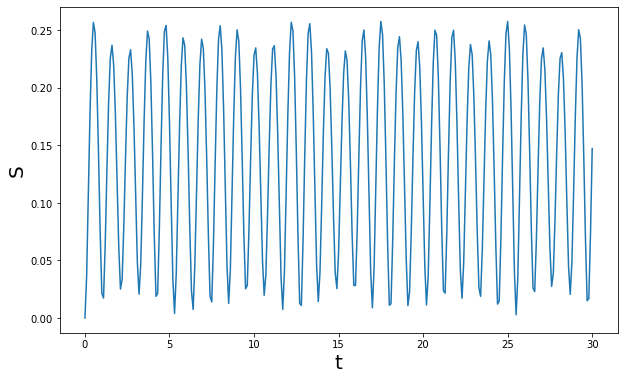

In [47]:
xvec = np.linspace(-3,3,200)

entropi_list = np.zeros(len(tlist))

H = Hamiltonian(omega_a=wa, omega_m=wc_list[0], g=0.1*wa, n=N, a=a, sm=sm, rwa=use_rwa)
me_result = mesolve(H, psi_0, tlist, [], [])
psi_list = me_result.states
for idx, psi in enumerate(psi_list):
    rhoo = ptrace(psi, 1)
    entropi_list[idx] = entropy_vn(rhoo, 2)

fig, axes = plt.subplots(1, 1, figsize=(10,6))
axes.plot(tlist, entropi_list, label=r"$\omega<\omega_{0}$")
#axes.set(xlim=(-0.5, 30.5), ylim=(0, 1.05))
#axes.plot(tlist, entropi_list[1], label=r"$\omega=\omega_{0}$")
#axes.plot(tlist, entropi_list[2], label=r"$\omega>\omega_{0}$")
#axes.legend(loc=0,  fontsize=13)
axes.set_xlabel('t', fontsize=20)
axes.set_ylabel('S', fontsize=20)
plt.savefig('Plot_entropi_frekuensi medan_waktu.pdf')  

In [93]:
P_a_e = []
P_a_g = []
H = Hamiltonian(omega_a=wa, omega_m=wc_list[1], g=1*wa, n=N, a=a, sm=sm, rwa=use_rwa)
me_result = mesolve(H, psi_0, tlist, [], [sm.dag()*sm, sm*sm.dag()])
P_a_e.append(me_result.expect[0])
P_a_g.append(me_result.expect[1])

In [94]:
H = Hamiltonian(omega_a=wa, omega_m=wc_list[0], g=1*wa, n=N, a=a, sm=sm, rwa=use_rwa)
me_result = mesolve(H, psi_0, tlist, [], [sm.dag()*sm, sm*sm.dag()])
P_a_e.append(me_result.expect[0])
P_a_g.append(me_result.expect[1])

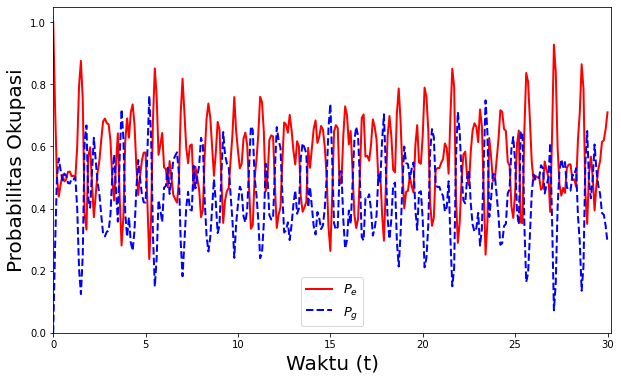

In [95]:
fig, axes = plt.subplots(1, 1, figsize=(10,6))
axes.plot(tlist, P_a_e[0],'-r', linewidth=2, label=r"$P_{e}$")
axes.plot(tlist, P_a_g[0],'--b', linewidth=2, label=r"$P_{g}$")
axes.legend(loc=0,  fontsize=13)
axes.set(xlim=(0, 30.2), ylim=(0, 1.05))
axes.set_xlabel('Waktu (t)', fontsize=20)
axes.set_ylabel('Probabilitas Okupasi', fontsize=20)
plt.savefig('Plot_prob okupasi_eg_f1.pdf')  

7